In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as conf_mat
from mnist_util import *

# Basic setup

Getting the training and test data and calculating means, variances (axis=None, axis=1) and covariances.

In [6]:
training, test = load_sorted_data('data_notMNIST')

PRIORS = {'id': lambda data: [np.identity(len(data[0][0])) for _ in range(len(data))],
        'var': lambda data: variance(data),
        'var_1': lambda data: variance(data, axis=0),
        'cov': lambda data: covariance(data)}

means = mean(training)

sigma = {}
for key in PRIORS:
    sigma[key] = PRIORS[key](training)

# Plotting

Here you can see the means and variances of the numbers in the training dataset.

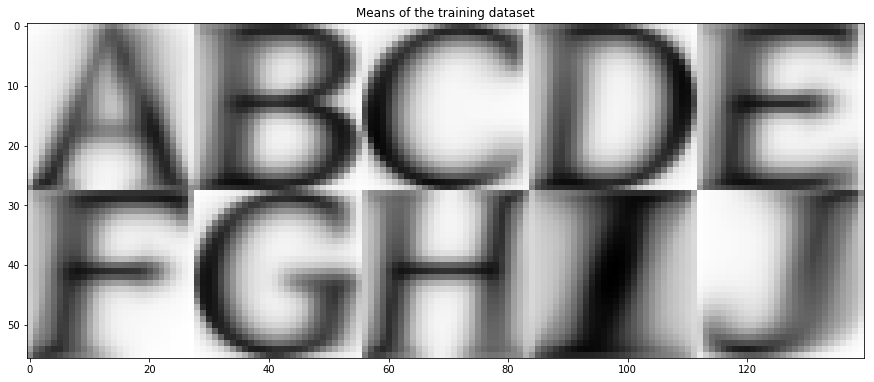

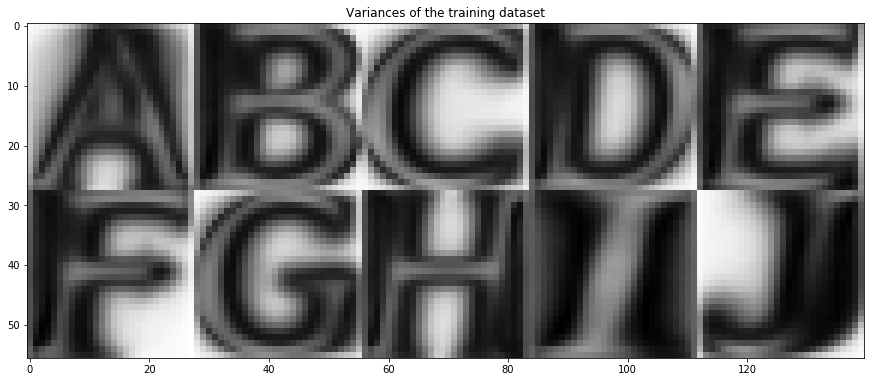

In [3]:
plot_all_numbers(means, elements_per_line=5, plot_title="Means of the training dataset")
plot_all_numbers(variances1, elements_per_line=5, plot_title="Variances of the training dataset")

# PDFs

Using Gaussian multivariate normal distribution.
Here I am trying in total 4 different PDFs, where I swapped out the $\Sigma$ (Prior).

* First one is $\Sigma =$ id.
* Second one is $\Sigma =$ variances.
* Third one is $\Sigma =$ variances1
* Fourth one is $\Sigma =$ covariances

In [7]:
pdfs = {}
for key in sigma:
    pdfs[key] = multivariates(training, sigma[key])

# First test run

Now I am plotting the first 20 numbers of each test dataset (0-9) and thereafter guess/predict the corresponding number with the four PDFs and then I will show the number of errors for each PDF for each number.

(The second next code snippet may take a while. It is processing the entire test data)

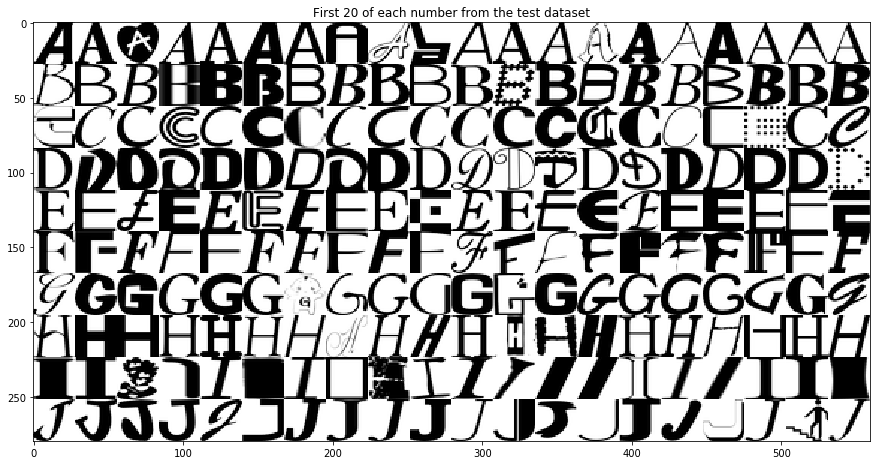

In [4]:
tmp = flatten_lists([test[i][:20] for i in range(10)])
tmp = [np.array(x) for x in tmp]
plot_all_numbers(tmp, elements_per_line=20, plot_title="First 20 of each number from the test dataset")

In [19]:
preds = {}
for key in pdfs:
    preds[key] = [tell_all_numbers(pdfs[key], nums) for nums in test]


In [18]:
for i in range(10):
    print("Right guess: {0}".format(i))
    for key in preds:
        print("{0}:\t{1}\tERRORS: {2}".format(key, preds[key][i][:20], len([x for x in preds[key][i][:20] if x != i])))
   
    print("")

Right guess: 0
id:	[0, 0, 8, 0, 0, 0, 0, 3, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	ERRORS: 4
var:	[0, 0, 8, 0, 0, 0, 0, 3, 9, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	ERRORS: 4
var_1:	[0, 0, 8, 0, 0, 0, 0, 7, 9, 1, 0, 0, 0, 9, 0, 9, 0, 0, 0, 0]	ERRORS: 6
cov:	[0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]	ERRORS: 2

Right guess: 1
id:	[9, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]	ERRORS: 2
var:	[9, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]	ERRORS: 2
var_1:	[0, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]	ERRORS: 2
cov:	[1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1]	ERRORS: 2

Right guess: 2
id:	[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 9, 2, 9]	ERRORS: 3
var:	[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 2, 9, 2, 9]	ERRORS: 3
var_1:	[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 4, 7, 2, 4]	ERRORS: 4
cov:	[6, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 8, 7, 2, 2]	ERRORS: 4

Right guess: 3
id:	[3, 3, 1, 3, 3, 3,

# Visualizing the result

Now I am going to visualize the results with confusion matrices.

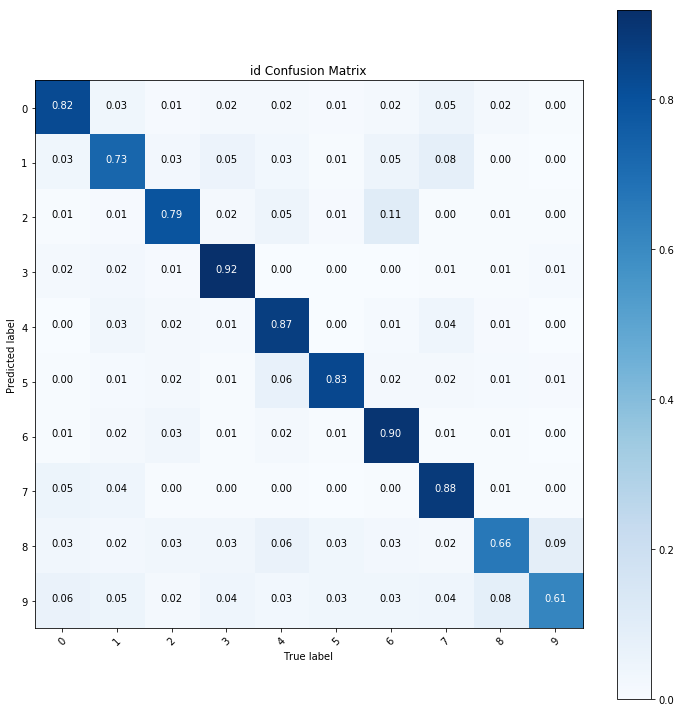

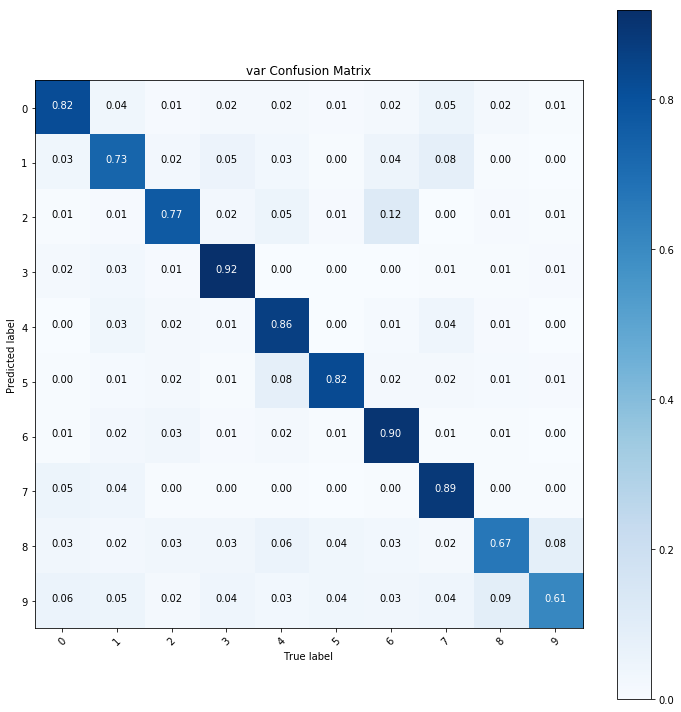

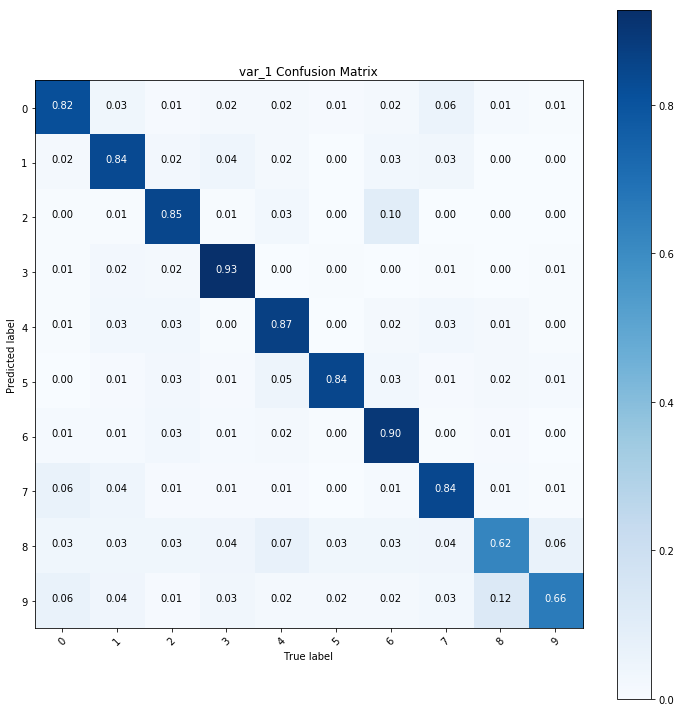

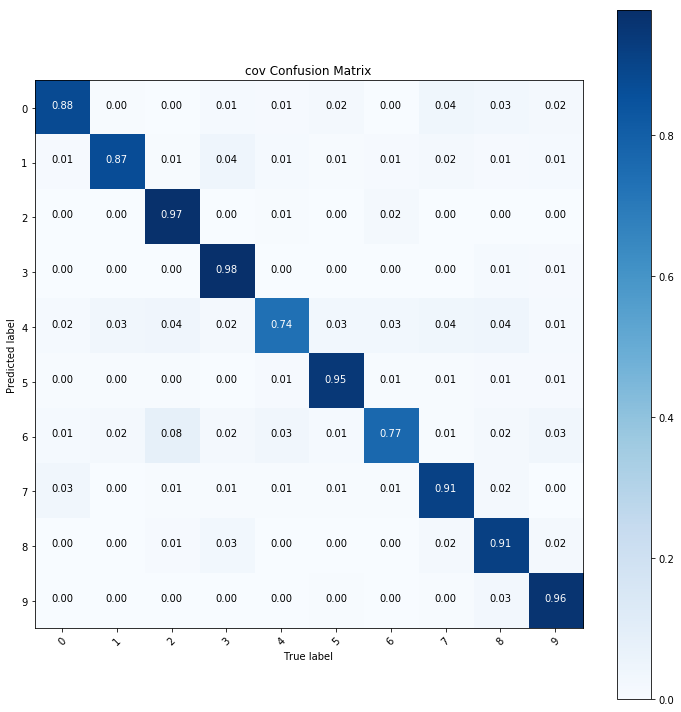

In [66]:
class_names = [str(i) for i in range(10)]

confusion_matrix = {}

training_labels = flatten_lists([[i]*len(preds['id'][i]) for i in range(10)])


#plot_confusion_matrix(conf_matrix, classes=class_names)

for key in preds:
    confusion_matrix[key] = conf_mat(flatten_lists(preds[key]), list(training_labels))


for key in confusion_matrix:
    plot.figure(figsize=(10,10))
    plot_confusion_matrix(normalize(confusion_matrix[key]), classes=class_names, title="{0} Confusion Matrix".format(key))
    plot.show()